モデルデータのOriginalの特徴量(X): (174, 5)
モデルデータの正解ラベルの個数
モデルデータの欠損値の補完後の特徴量(X_ohe): (174, 5)
RFECVによるモデルデータの特徴量選択後(X_ohe_selected): (174, 3)
【RFECVにより特徴量を選択します。】 f1_weighted
AdaBoostClassifier :	 0.5867 +- 0.0423
BaggingClassifier :	 0.5575 +- 0.0574
BernoulliNB :	 0.3608 +- 0.0595
CalibratedClassifierCV :	 0.3459 +- 0.0224
DecisionTreeClassifier :	 0.5978 +- 0.0172
ExtraTreeClassifier :	 0.5463 +- 0.0348
ExtraTreesClassifier :	 0.5284 +- 0.0442
GaussianNB :	 0.519 +- 0.0695
GradientBoostingClassifier :	 0.5802 +- 0.0675
KNeighborsClassifier :	 0.5259 +- 0.0437
LabelPropagation :	 0.3608 +- 0.0595
LabelSpreading :	 0.3608 +- 0.0595
LinearDiscriminantAnalysis :	 0.5253 +- 0.0592
LinearSVC :	 0.3608 +- 0.0595
LogisticRegression :	 0.3573 +- 0.0721
LogisticRegressionCV :	 0.3665 +- 0.0713
MLPClassifier :	 0.3098 +- 0.0588
NearestCentroid :	 0.4145 +- 0.036
PassiveAggressiveClassifier :	 0.3608 +- 0.0595
Perceptron :	 0.3098 +- 0.0588
QuadraticDiscriminantAnalysis :	 0.4668 +- 0.0275
RandomForestC

XGBClassifier : roc_auc : 0.6641 +- 0.174
 [roc_auc:	 0.6641 +- 0.174 ]
 [accuracy:	 0.6085 +- 0.1337 ]
 [precision:	 0.6008 +- 0.1384 ]
 [recall:	 0.653 +- 0.1474 ]
 [f1:		 0.6111 +- 0.1069 ]
 [f1_weight:	 0.6053 +- 0.1386 ]
 [f1_micro:	 0.6085 +- 0.1337 ]

confusion matrix:
 [[72 19]
 [14 69]] 

classification report:
             precision    recall  f1-score   support

        0.0       0.84      0.79      0.81        91
        1.0       0.78      0.83      0.81        83

avg / total       0.81      0.81      0.81       174

XGBClassifier : roc_auc : 0.6531 +- 0.1586
 [roc_auc:	 0.6531 +- 0.1586 ]
 [accuracy:	 0.6042 +- 0.1318 ]
 [precision:	 0.5975 +- 0.1149 ]
 [recall:	 0.5933 +- 0.202 ]
 [f1:		 0.5758 +- 0.1283 ]
 [f1_weight:	 0.5958 +- 0.1386 ]
 [f1_micro:	 0.6042 +- 0.1318 ]

confusion matrix:
 [[70 21]
 [17 66]] 

classification report:
             precision    recall  f1-score   support

        0.0       0.80      0.77      0.79        91
        1.0       0.76      0.80

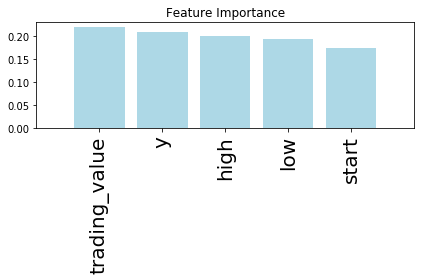

In [4]:
# 評価指標をroc_auc に設定
%run -i stock_AutoClassifier.py

In [5]:
print(X.tail())
print(y.tail())

     start  high   low     y  trading_value
169   1949  2042  1925  2034         824000
170   2022  2058  1979  1989         524400
171   2007  2031  1979  2001         328600
172   2010  2060  2010  2016         613900
173   2041  2050  1920  1928         506300
     Unnamed: 8
169         0.0
170         1.0
171         1.0
172         0.0
173         1.0


In [6]:
test_data = open("./data/6047_test.csv", "r")

# 一行ずつ読み込んでは表示する
for line in test_data:
    print(line)
    
predict = gs.predict(Xs_exp_selected)[:5]
print(predict)
print("\n")

predict_p = gs.predict_proba(Xs_exp_selected)[:,[1]]
print(predict_p)

date,start,high,low,end,dekidaka,adjust

2018-10-05,1914,1957,1905,1947,327000,1947

[1.]


[[0.9038962]]


In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./data/6047.csv', engine = 'python', names=('ds', 'start', 'high', 'low', 'y', 'trading_value','adjust_end', 'diff', 'target'))
df = df['y']
df.tail(5)
#df.plot()

171    1989
172    2001
173    2016
174    1928
175    1944
Name: y, dtype: object

In [16]:
df.head(1)

0    y
Name: y, dtype: object

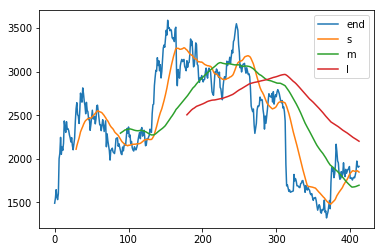

In [7]:
ma = df.copy()
ma = df[["end"]]

ma["s"] = ma.end.rolling(30).mean()
ma["m"] = ma.end.rolling(90).mean()
ma["l"] = ma.end.rolling(180).mean()

ma.plot()

In [8]:
ss0 = ma.s.iloc[0]
#mm0 = ma.m.iloc[0]
mm0 = ma.m.iloc[0]

buysignal= 0
sellsignal= 0

for i in range(1, len(ma)):
    ss=ma.s.iloc[i]
    mm=ma.m.iloc[i]
    
    if ss0 < mm0 and ss > mm:
        buysignal += 1
    if ss0 > mm0 and ss < mm:
        sellsignal += 1
    
    ss0 = ss
    mm0 = mm

print(buysignal, sellsignal)
    

3 2


5 5 [0] [0]
5 65 [-747] [3]
5 125 [-1183] [1]
5 185 [522] [1]
25 5 [-630] [4]
25 65 [-589] [2]
25 125 [-1093] [1]
25 185 [522] [1]
45 5 [-763] [4]
45 65 [-204] [2]
45 125 [-897] [1]
45 185 [522] [1]
65 5 [-7] [4]
65 65 [0] [0]
65 125 [-493] [1]
65 185 [522] [1]
85 5 [58] [4]
85 65 [-554] [2]
85 125 [-1308] [1]
85 185 [522] [1]
105 5 [29] [3]
105 65 [-826] [2]
105 125 [-1308] [1]
105 185 [522] [1]
125 5 [-101] [4]
125 65 [282] [2]
125 125 [0] [0]
125 185 [522] [1]
145 5 [-612] [2]
145 65 [243] [1]
145 125 [193] [2]
145 185 [522] [1]
165 5 [-379] [1]
165 65 [272] [1]
165 125 [0] [1]
165 185 [522] [1]
185 5 [-438] [1]
185 65 [392] [1]
185 125 [0] [0]
185 185 [0] [0]


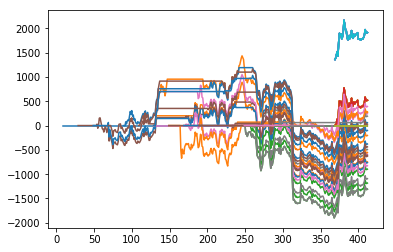

In [24]:
def crossover(ma):
  ma.pl = 0
  ma.n = 0
  buy = 0   # 購入価格
  buyF = 0  # 買いフラグ
  sellF = 0 # 売りフラグ
  c0 = ma.end.iloc[0]
  s0 = ma.s.iloc[0]
  l0 = ma.l.iloc[0]
  n = 0
  for i in range(1, len(ma)):
    c = ma.end.iloc[i]
    s = ma.s_hat.iloc[i]
    l = ma.l_hat.iloc[i]
    if buy != 0:
      ma.iloc[i, 5] = c - c0 # 収益
    if s > l:
      buyF = 1
      sellF = 0
    if s < l:
      sellF = 1
      buyF = 0
    if buyF == 1 and buy == 0:
      buy = c
      n += 1 # 取引の回数加算
    if sellF == 1 and buy != 0 and c > buy:
      buy = 0
    c0 = c; s0 = l; l0 = l
    ma.iloc[i, 6] = n # 取引の回数
  return ma

for s in range(5, 200, 20):
    for l in range(5, 200, 60):
        
        ma = df.copy()
        ma = df[["end"]]
        ma["s"] = ma.end.rolling(s).mean()
        ma["l"] = ma.end.rolling(l).mean()
        ma["s_hat"] = ma.s.shift(l)
        ma["l_hat"] = ma.l.shift(l)
        ma = ma.dropna()
        ma['pl'] = 0
        ma['n'] = 0
        ma0 = crossover(ma)
        ma0.pl.cumsum().plot()
        print(s, l, (ma0.pl.cumsum().tail(1)).values, (ma0.iloc[-1:,6]).values)
    
    ma.end.plot()
        

収益 412    0
Name: pl, dtype: int64 取引回数 412    0
Name: n, dtype: int64


KeyError: -1

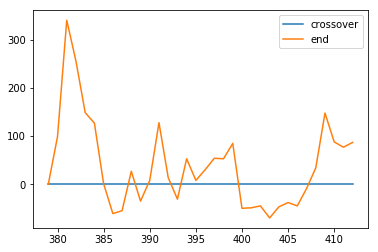

In [23]:
ma0 = crossover(ma)
ma0.pl.cumsum().plot(label="crossover")
(ma0.end - ma0.end.iloc[0]).plot()
plt.legend()
print('収益', ma0.pl.cumsum().tail(1), '取引回数', ma0.n.tail(1))
print('保有し続けた場合の収益', ma0.end[-1] - ma0.end.iloc[0])